<a href="https://colab.research.google.com/github/adoumadje/machine-learning-labs/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
tv = pd.read_csv("/content/tv_shows.csv", header=None)
tv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Cobra Kai,Lupin,12 Monkeys,Sherlock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sex Education,Dr. House,Kingdom,The Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ozark,Sex Education,Constantine,Preacher,Vikings,The Tick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,One Piece,The Blacklist,Two and a half men,Lupin,Dark,How I met your mother,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9686,One Piece,Mr. Robot,Succession,Ozark,12 Monkeys,Vikings,The Vampire Diaries,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9687,Daredevil,Atypical,Heros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9688,Absentia,The Newsroom,The Alienist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tv.stack().value_counts(normalize=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,proportion
Sex Education,0.057912
Ozark,0.043884
Two and a half men,0.041593
Outer Banks,0.039652
Atypical,0.031703
...,...
Sneaky Pete,0.000187
Teen Wolf,0.000164
Good Omens,0.000140
Iron Fist,0.000094


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

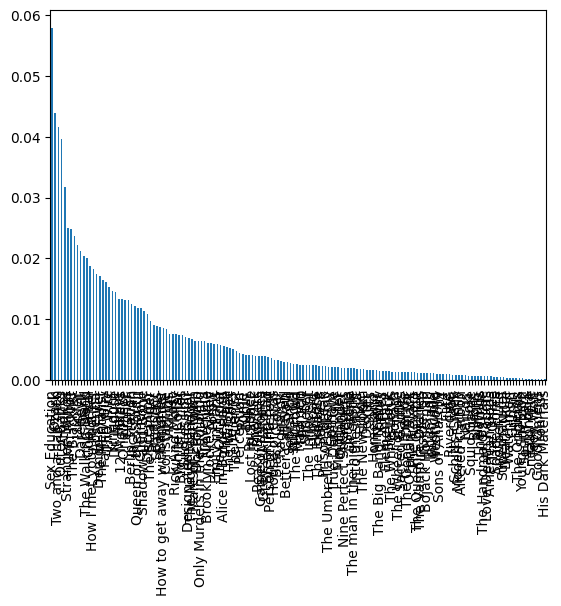

In [7]:
tv.stack().value_counts(normalize=True).plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

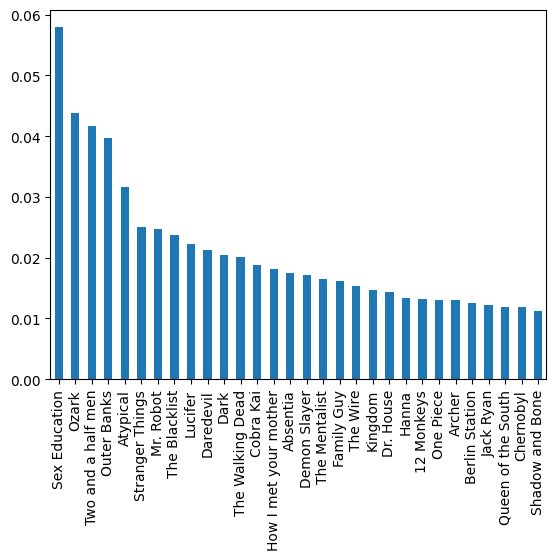

In [8]:
tv.stack().value_counts(normalize=True)[:30].plot(kind='bar')

In [9]:
tv.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9690, 32)

In [11]:
trans=[]
for i in range(tv.shape[0]):
  row = tv.iloc[i].dropna().tolist()
  trans.append(row)
trans

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Cobra Kai', 'Lupin', '12 Monkeys', 'Sherlock'],
 ['Lost',
  'Jack Ryan',
  'The Flash',
  'Game of thrones',
  'House of Cards',
  '12 Monkeys',
  'Vikings',
  'Fringe',
  'The Mentalist',
  'The Alienist',
  'Big Little Lies',
  'Chernobyl'],
 ['Sex Education', 'Dr. House', 'Kingdom', 'The Walking Dead'],
 ['Ozark', 'Sex Education', 'Constantine', 'Preacher', 'Vikings', 'The Tick'],
 ['Naruto'],
 ['Sex Education'],
 ['Locke & Key'],
 ['Lupin'],
 ['Fringe', 'Shooter', 'How to get away with murder'],
 ['Queen of the South', 'Better Call Saul', 'Peaky Blinders'],
 ['Sex Education'],
 ['Atypical', 'Stranger Things', 'Homeland', 'Brooklyn Nine Nine'],
 ['Daredevil', 'Atypical', 'The Walking Dead', 'The Witcher'],
 ['One Piece', 'Queen of the South'],
 ['Demon Slayer',
  'Atypical',
  'Stranger Things',
  'Absentia',
  'The Alienist',
  'Chernobyl'],
 ['Queen of the South',
  'The Blacklist',
  'Succession',
  'Sex Education',
  'Berlin Station',
  'Atypical',
  'Two and a half men',
  '

In [12]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary=te.fit(trans).transform(trans)
te_ary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,...,True Detective,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9686,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9687,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9688,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
apriori(df, min_support=0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.058617,(0)
1,0.077090,(2)
2,0.024768,(3)
3,0.057792,(7)
4,0.026109,(8)
...,...,...
342,0.017234,"(97, 82, 118)"
343,0.010526,"(97, 82, 126)"
344,0.010733,"(97, 82, 138)"
345,0.018163,"(97, 82, 147)"


In [20]:
apriori(df, min_support=0.001, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.058617,(12 Monkeys)
1,0.004334,(24)
2,0.077090,(Absentia)
3,0.024768,(Alice in Borderland)
4,0.003302,(Altered Carbon)
...,...,...
13688,0.001032,"(Sex Education, Only Murders in the building, ..."
13689,0.001135,"(Stranger Things, Sex Education, Mr. Robot, Oz..."
13690,0.001032,"(Sex Education, Mr. Robot, Ozark, The Wire, Th..."
13691,0.001342,"(Sex Education, Mr. Robot, Ozark, Two and a ha..."


In [21]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.058617,(12 Monkeys),1
1,0.077090,(Absentia),1
2,0.024768,(Alice in Borderland),1
3,0.057792,(Archer),1
4,0.026109,(Arrow),1
...,...,...,...
342,0.017234,"(Ozark, Sex Education, The Blacklist)",3
343,0.010526,"(Ozark, Sex Education, The Mentalist)",3
344,0.010733,"(Ozark, Sex Education, The Walking Dead)",3
345,0.018163,"(Ozark, Sex Education, Two and a half men)",3


In [23]:
frequent_itemsets[frequent_itemsets['length'] == 3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
313,0.010114,"(Cobra Kai, Sex Education, Atypical)",3
314,0.010217,"(Ozark, Family Guy, Atypical)",3
315,0.010836,"(Family Guy, Sex Education, Atypical)",3
316,0.010217,"(Sex Education, Jack Ryan, Atypical)",3
317,0.013003,"(Ozark, Mr. Robot, Atypical)",3
318,0.014551,"(Sex Education, Mr. Robot, Atypical)",3
319,0.010423,"(Sex Education, Atypical, Outer Banks)",3
320,0.022394,"(Ozark, Sex Education, Atypical)",3
321,0.012487,"(Ozark, The Blacklist, Atypical)",3
322,0.011662,"(Ozark, Two and a half men, Atypical)",3


In [24]:
association_rules(frequent_itemsets, metric='confidence', min_threshold=0.25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(12 Monkeys),(Ozark),0.058617,0.193705,0.019711,0.336268,1.735979,0.008357,1.214790,0.450355
1,(12 Monkeys),(Sex Education),0.058617,0.255624,0.024252,0.413732,1.618517,0.009268,1.269686,0.405946
2,(12 Monkeys),(Two and a half men),0.058617,0.183591,0.014861,0.253521,1.380899,0.004099,1.093680,0.293010
3,(Alice in Borderland),(Sex Education),0.024768,0.255624,0.010836,0.437500,1.711496,0.004505,1.323334,0.426274
4,(Archer),(Sex Education),0.057792,0.255624,0.018473,0.319643,1.250440,0.003700,1.094095,0.212566
...,...,...,...,...,...,...,...,...,...,...
171,"(The Walking Dead, Sex Education)",(Ozark),0.033540,0.193705,0.010733,0.320000,1.651998,0.004236,1.185728,0.408369
172,"(Ozark, Two and a half men)",(Sex Education),0.042828,0.255624,0.018163,0.424096,1.659061,0.007215,1.292535,0.415024
173,"(Sex Education, Two and a half men)",(Ozark),0.056553,0.193705,0.018163,0.321168,1.658027,0.007208,1.187768,0.420663
174,"(Sex Education, The Blacklist)",(Two and a half men),0.042312,0.183591,0.010836,0.256098,1.394933,0.003068,1.097467,0.295628


In [26]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.25)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(12 Monkeys),(Ozark),0.019711,0.336268,1.735979
1,(12 Monkeys),(Sex Education),0.024252,0.413732,1.618517
2,(12 Monkeys),(Two and a half men),0.014861,0.253521,1.380899
3,(Alice in Borderland),(Sex Education),0.010836,0.437500,1.711496
4,(Archer),(Sex Education),0.018473,0.319643,1.250440
...,...,...,...,...,...
171,"(The Walking Dead, Sex Education)",(Ozark),0.010733,0.320000,1.651998
172,"(Ozark, Two and a half men)",(Sex Education),0.018163,0.424096,1.659061
173,"(Sex Education, Two and a half men)",(Ozark),0.018163,0.321168,1.658027
174,"(Sex Education, The Blacklist)",(Two and a half men),0.010836,0.256098,1.394933


In [28]:
rules[rules['antecedents'] == {'12 Monkeys'}]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(12 Monkeys),(Ozark),0.019711,0.336268,1.735979
1,(12 Monkeys),(Sex Education),0.024252,0.413732,1.618517
2,(12 Monkeys),(Two and a half men),0.014861,0.253521,1.380899


In [31]:
rules[rules['consequents'] == {'Sex Education'}]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1,(12 Monkeys),(Sex Education),0.024252,0.413732,1.618517
3,(Alice in Borderland),(Sex Education),0.010836,0.437500,1.711496
4,(Archer),(Sex Education),0.018473,0.319643,1.250440
5,(Arrow),(Sex Education),0.011662,0.446640,1.747253
14,(Atypical),(Sex Education),0.056140,0.401180,1.569412
...,...,...,...,...,...
166,"(Ozark, The Blacklist)",(Sex Education),0.017234,0.481268,1.882716
168,"(Ozark, The Mentalist)",(Sex Education),0.010526,0.497561,1.946454
170,"(Ozark, The Walking Dead)",(Sex Education),0.010733,0.479263,1.874871
172,"(Ozark, Two and a half men)",(Sex Education),0.018163,0.424096,1.659061
